# Results of the Corruption Model

We will show the basic components of the corruption model and some results with different initial parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corruption as abm
import networkx as nx
import datetime
import concurrent.futures

plt.style.use('bmh')

In [6]:
t0 = datetime.datetime.now()

one = abm.Model(500, 'R', 'H', 50, 100, 100, 0.1, 0.2, 'u')
one.Generate()
one.NetSetup(0.2, 0.1)
one.Subset()
for i in range(208):
    one.Step(0.4, 0.002, newenter=True)
a = one.getJailed()
aa = one.getNet()
aaa = one.getTransactions()

t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:00:05.421370 to run


In [5]:
t0 = datetime.datetime.now()

two = abm.Model(500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'u')
two.Generate()
two.NetSetup(0.2, 0.1)
two.Subset()
for i in range(208):
    two.Step(0.4, 0.002, newenter=True)
b = two.getJailed()
bb = two.getNet()
bbb = two.getTransactions()

t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:00:03.859425 to run


In [4]:
t0 = datetime.datetime.now()

three = abm.Model(500, 'H', 'H', 50, 100, 100, 0.1, 0.2, 'u')
three.Generate()
three.NetSetup(0.2, 0.1)
three.Subset()
for i in range(208):
    three.Step(0.4, 0.002, newenter=True)
c = three.getJailed()
cc = three.getNet()
ccc = three.getTransactions()

t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:00:51.939175 to run


In [27]:
len(a)

52

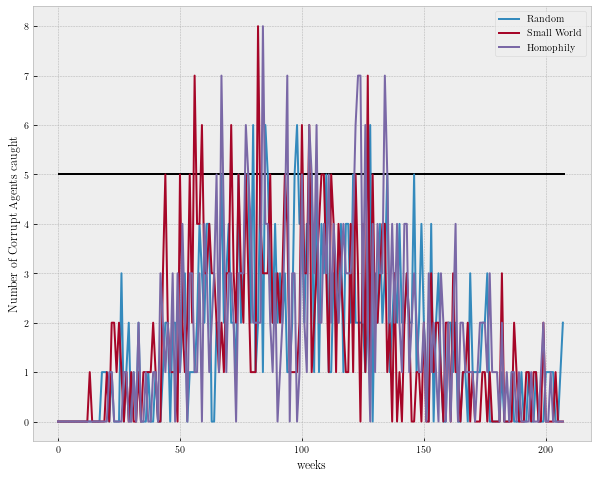

In [19]:
plt.figure(figsize=(10, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel("weeks")
plt.ylabel("Number of Corrupt Agents caught")
plt.plot([x for x in range(len(a))], [len(y) for y in a], "-", label="Random")
plt.plot([x for x in range(len(b))], [len(y) for y in b], "-", label="Small World")
plt.plot([x for x in range(len(c))], [len(y) for y in c], "-", label="Homophily")
plt.legend()
plt.hlines(5, 0, len(a))
#plt.savefig("../plots/caught1.png", dpi=300)

In [76]:
aa = one.getJailed()

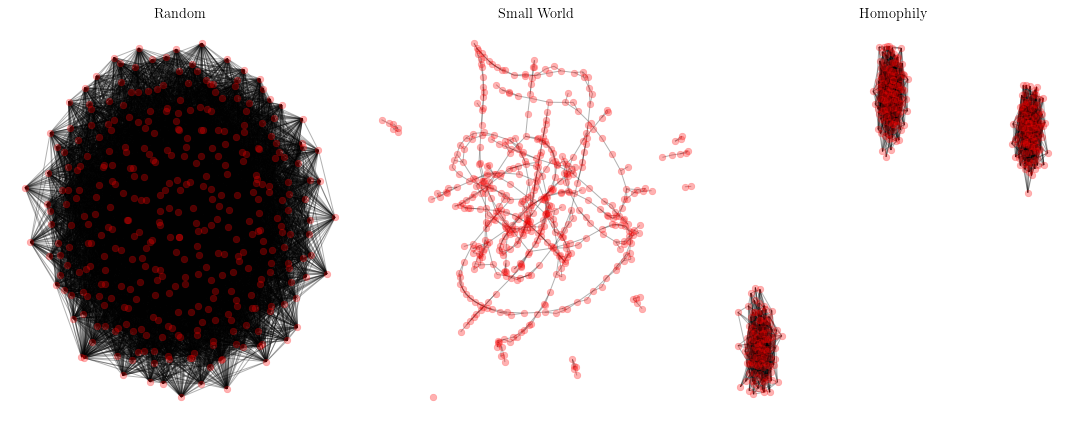

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("Random")
nx.draw_networkx(aa, with_labels=False, alpha = 0.3, node_size = 45, edge_size = 0.5, node_color='red')

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Small World")
nx.draw_networkx(bb, with_labels=False, alpha = 0.3, node_size = 45, edge_size = 0.5, node_color='red')

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Homophily")
nx.draw_networkx(cc, with_labels=False, alpha = 0.3, node_size = 45, edge_size = 0.5, node_color='red')

plt.tight_layout()

#plt.savefig("/home/vsvh/Documents/SUBMISSIONS/CSSSA2019/img/f2.png", dpi=300)

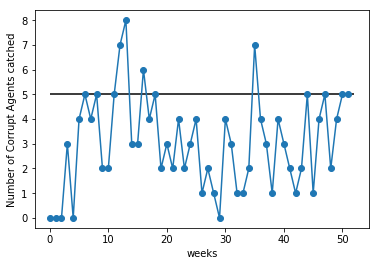

In [7]:
aa = one.getNet()
bb = two.getNet()
cc = three.getNet()

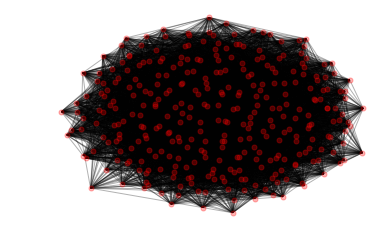

In [11]:
plt.axis("off")
#plt.title("Random")
nx.draw_networkx(aa, with_labels=False, alpha = 0.3, node_size = 25, edge_size = 0.5)
plt.savefig("../plots/randomnet.png", dpi=300)

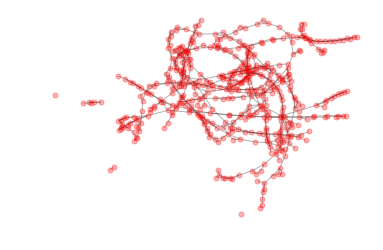

In [12]:
plt.axis("off")
#plt.title("Small World")
nx.draw_networkx(bb, with_labels=False, alpha = 0.3, node_size = 25, edge_size = 0.5)
plt.savefig("../plots/smallworldnet.png", dpi=300)

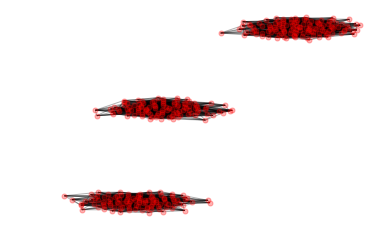

In [13]:
plt.axis("off")
#plt.title("Homophily")
nx.draw_networkx(cc, with_labels=False, alpha = 0.3, node_size = 25, edge_size = 0.5)
plt.savefig("../plots/homophilynet.png", dpi=300)

In [40]:
four = abm.Model(500, 'R', 'R', 20, 30, 100, 0.1, 0.2, 'u')
four.Generate()
four.NetSetup(0.2, 0.1)
four.Subset()
for i in range(52):
    four.Step(0.4, 0.002)
d = four.getJailed()

five = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'u')
five.Generate()
five.NetSetup(0.2, 0.1)
five.Subset()
for i in range(52):
    five.Step(0.4, 0.002)
e = five.getJailed()

six = abm.Model(500, 'H', 'R', 20, 30, 100, 0.1, 0.2, 'u')
six.Generate()
six.NetSetup(0.2, 0.1)
six.Subset()
for i in range(52):
    six.Step(0.4, 0.002)
f = six.getJailed()

NameError: name 'd' is not defined

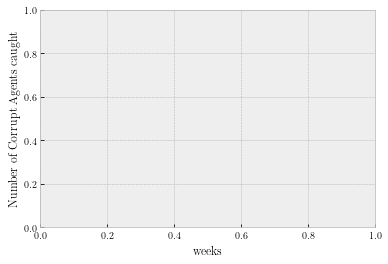

In [6]:
plt.xlabel("weeks")
plt.ylabel("Number of Corrupt Agents caught")
plt.plot([x for x in range(len(d))], [len(y) for y in d], "-", label="Random")
plt.plot([x for x in range(len(e))], [len(y) for y in e], "-", label="Small World")
plt.plot([x for x in range(len(f))], [len(y) for y in f], "-", label="Homophily")
plt.legend()
plt.hlines(5, 0, len(d))
#plt.savefig("../plots/caught2.png", dpi=300)

In [9]:
aaa = one.getTransactions()
bbb = two.getTransactions()
ccc = three.getTransactions()

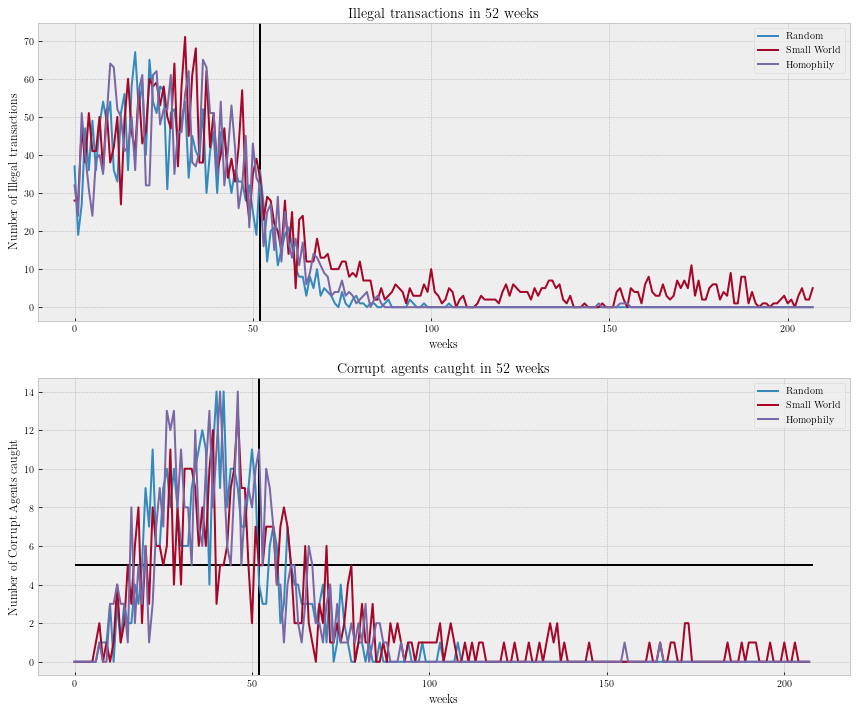

In [52]:
plt.figure(figsize=(12, 10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.subplot(211)
plt.title("Illegal transactions in 52 weeks")
plt.xlabel("weeks")
plt.ylabel("Number of Illegal transactions")
plt.axvline(52, color='black')
plt.plot(list(range(len(aaa))), aaa, "-", label="Random")
plt.plot(list(range(len(bbb))), bbb, "-", label="Small World")
plt.plot(list(range(len(ccc))), ccc, "-", label="Homophily")
plt.legend()
plt.tight_layout()

plt.subplot(212)
plt.title("Corrupt agents caught in 52 weeks")
plt.xlabel("weeks")
plt.ylabel("Number of Corrupt Agents caught")
plt.axvline(52, color='black')
plt.plot([x for x in range(len(a))], [len(y) for y in a], "-", label="Random")
plt.plot([x for x in range(len(b))], [len(y) for y in b], "-", label="Small World")
plt.plot([x for x in range(len(c))], [len(y) for y in c], "-", label="Homophily")
plt.legend()
plt.hlines(5, 0, len(a))
plt.tight_layout()
plt.savefig("../img/presentation2.png", dpi=300)

In [19]:
tmp1 = []
for G in [aa, bb, cc]:
    tmp2 = []
    for C in nx.connected_component_subgraphs(G):
        tmp2.append(nx.average_shortest_path_length(C))
    tmp1.append(np.mean(tmp2))
    
tmp1

[1.8245555862577139, 6.285913446774641, 1.913596296735582]

In [20]:
print(f'{tmp1[0]: .4f} | {tmp1[1]: .4f} | {tmp1[2]: .4f}')

 1.8246 |  6.2859 |  1.9136


In [41]:
ddd = four.getTransactions()
eee = five.getTransactions()
fff = six.getTransactions()

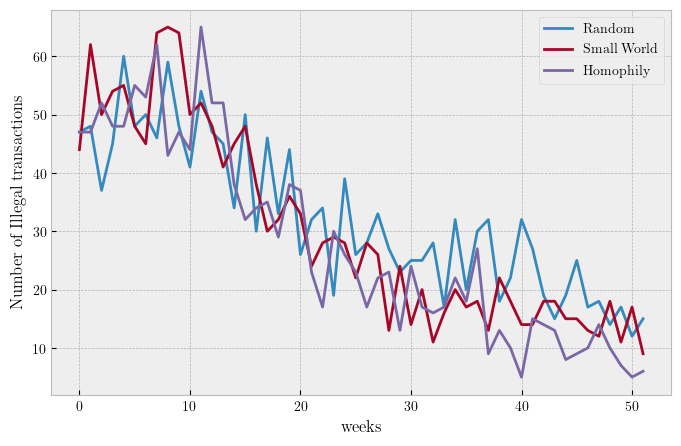

In [43]:
plt.figure(figsize=(8, 5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel("weeks")
plt.ylabel("Number of Illegal transactions")
plt.plot(list(range(len(ddd))), ddd, "-", label="Random")
plt.plot(list(range(len(eee))), eee, "-", label="Small World")
plt.plot(list(range(len(fff))), fff, "-", label="Homophily")
plt.legend()
plt.savefig("/home/vsvh/Documents/SUBMISSIONS/CSSSA2019/img/f4.png", dpi=300)

## Multiple instances of the model

In [4]:
t0 = datetime.datetime.now()

tmpa = []
for i in range(10):
    uno = abm.Model(500, 'R', 'H', 20, 30, 100, 0.1, 0.2, 'u')
    uno.Generate()
    uno.NetSetup(0.2, 0.1)
    for j in range(52):
        uno.Step(0.4, 0.002)
    tmpa.append(uno.getTransactions())
    
#tmpa2 = []
#for i in range(52):
#    tmpa3 = []
#    for j in range(len(tmpa)):
#        tmpa3.append(tmpa[j][i])
#    tmpa2.append([np.mean(tmpa3), np.std(tmpa3)])

t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:00:24.435208 to run


In [39]:
tmpa[1][2]

68

In [7]:
t0 = datetime.datetime.now()

tmpb = []
for i in range(10):
    dos = abm.Model(500, 'S', 'H', 20, 30, 100, 0.1, 0.2, 'u')
    dos.Generate()
    dos.NetSetup(0.2, 0.1)
    for j in range(52):
        dos.Step(0.4, 0.002)
    tmpb.append(dos.getTransactions())
    
#tmpb2 = []
#for i in range(52):
#    tmpb3 = []
#    for j in range(len(tmpb)):
#        tmpb3.append(tmpb[j][i])
#    tmpb2.append([np.mean(tmpb3), np.std(tmpb3)])
    
t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:00:12.017924 to run


In [9]:
t0 = datetime.datetime.now()

tmpc = []
for i in range(10):
    tres = abm.Model(500, 'H', 'H', 20, 30, 100, 0.1, 0.2, 'u')
    tres.Generate()
    tres.NetSetup(0.2, 0.1)
    for j in range(52):
        tres.Step(0.4, 0.002)
    tmpc.append(tres.getTransactions())
    
#tmpc2 = []
#for i in range(52):
#    tmpc3 = []
#    for j in range(len(tmpc)):
#        tmpc3.append(tmpc[j][i])
#    tmpc2.append([np.mean(tmpc3), np.std(tmpc3)])
    
t1 = datetime.datetime.now()
print(f'Took {t1 - t0} to run')

Took 0:08:11.615632 to run


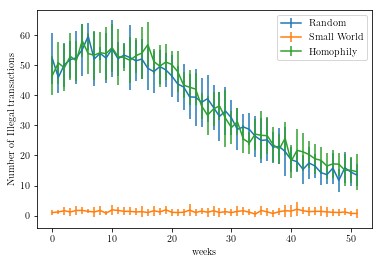

In [22]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel("weeks")
plt.ylabel("Number of Illegal transactions")
plt.errorbar(list(range(len(tmpa2))), [y[0] for y in tmpa2], yerr = [y[1] for y in tmpa2], label="Random")
plt.errorbar(list(range(len(tmpb2))), [y[0] for y in tmpb2], yerr = [y[1] for y in tmpb2], label="Small World")
plt.errorbar(list(range(len(tmpc2))), [y[0] for y in tmpc2], yerr = [y[1] for y in tmpc2], label="Homophily")
plt.legend()
plt.savefig("../plots/multipleinstances.png", dpi=300)

# Trying to parallel the code

In [15]:
mp.cpu_count()

4

In [54]:
def dopara(a, b, c, d, e, f, g, h, i):
    one = abm.Model(a, b, c, d, e, f, g, h, i)
    one.Generate()
    one.NetSetup(0.4, 0.1)
    one.Subset()
    for _ in range(75):
        one.Step(0.4, 0.002, newenter=True)
    a = one.getJailed()
    #aa = one.getNet()
    aaa = one.getTransactions()
    result = {}
    result['jailed'] = a
    #result['net'] = aa
    result['transactions'] = aaa
    return result

In [55]:
t0 = datetime.datetime.now()

testa2 = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    resultsa = [executor.submit(dopara, 500, 'R', 'H', 50, 100, 100, 0.1, 0.2, 'u') for _ in range(50)]
    
    for f in concurrent.futures.as_completed(resultsa):
        testa2.append(f.result())  
    
t1 = datetime.datetime.now()
delta = t1 - t0
print(f'Took {delta} to run in parallel')

Took 0:07:55.420174 to run in parallel


In [16]:
jailedA = {}
transA = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testa)):
        weekJ.append(len(testa[run]['jailed'][week]))
        weekT.append(testa[run]['transactions'][week])
    jailedA[week] = np.mean(weekJ)
    transA[week] = np.mean(weekT)        

In [59]:
jailedA2 = {}
transA2 = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testa2)):
        weekJ.append(len(testa2[run]['jailed'][week]))
        weekT.append(testa2[run]['transactions'][week])
    jailedA2[week] = np.mean(weekJ)
    transA2[week] = np.mean(weekT)

In [58]:
t0 = datetime.datetime.now()

testb2 = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    resultsb = [executor.submit(dopara, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'u') for _ in range(50)]
    
    for f in concurrent.futures.as_completed(resultsb):
        testb2.append(f.result())  
    
t1 = datetime.datetime.now()
delta = t1 - t0
print(f'Took {delta} to run in parallel')

Took 0:03:16.483000 to run in parallel


In [20]:
jailedB = {}
transB = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testb)):
        weekJ.append(len(testb[run]['jailed'][week]))
        weekT.append(testb[run]['transactions'][week])
    jailedB[week] = np.mean(weekJ)
    transB[week] = np.mean(weekT)

In [61]:
jailedB2 = {}
transB2 = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testb2)):
        weekJ.append(len(testb2[run]['jailed'][week]))
        weekT.append(testb2[run]['transactions'][week])
    jailedB2[week] = np.mean(weekJ)
    transB2[week] = np.mean(weekT)

In [63]:
t0 = datetime.datetime.now()

testc2 = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    resultsc = [executor.submit(dopara, 500, 'H', 'H', 50, 100, 100, 0.1, 0.2, 'u') for _ in range(50)]
    
    for f in concurrent.futures.as_completed(resultsc):
        testc2.append(f.result())  
    
t1 = datetime.datetime.now()
delta = t1 - t0
print(f'Took {delta} to run in parallel')

Took 2:24:32.670584 to run in parallel


In [21]:
jailedC = {}
transC = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testc)):
        weekJ.append(len(testc[run]['jailed'][week]))
        weekT.append(testc[run]['transactions'][week])
    jailedC[week] = np.mean(weekJ)
    transC[week] = np.mean(weekT)

In [64]:
jailedC2 = {}
transC2 = {}
for week in range(75):
    weekJ = []
    weekT = []
    for run in range(len(testc2)):
        weekJ.append(len(testc2[run]['jailed'][week]))
        weekT.append(testc2[run]['transactions'][week])
    jailedC2[week] = np.mean(weekJ)
    transC2[week] = np.mean(weekT)

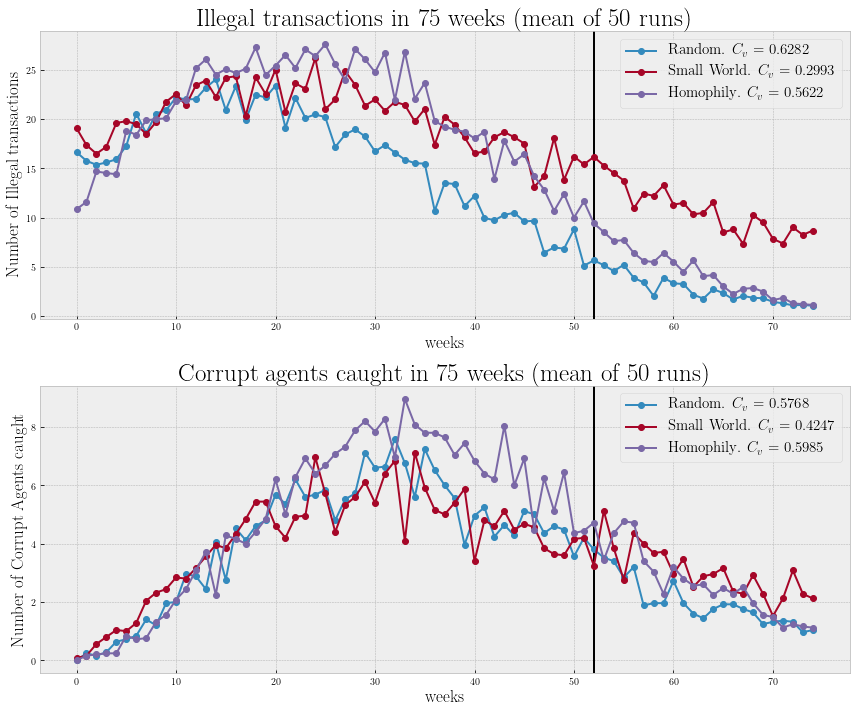

In [52]:
plt.figure(figsize=(12, 10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.subplot(211)
plt.title("Illegal transactions in 75 weeks (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Illegal transactions", fontsize=17)
plt.axvline(52, color='black')
plt.plot(list(transA.keys()), list(transA.values()), "o-", 
         label=f"Random. $C_v =$ {np.std(list(transA.values())) / np.mean(list(transA.values())): .4f}")
plt.plot(list(transB.keys()),list(transB.values()), "o-", 
         label=f"Small World. $C_v =$ {np.std(list(transB.values())) / np.mean(list(transB.values())): .4f}")
plt.plot(list(transC.keys()),list(transC.values()), "o-", 
         label=f"Homophily. $C_v =$ {np.std(list(transC.values())) / np.mean(list(transC.values())): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()

plt.subplot(212)
plt.title("Corrupt agents caught in 75 weeks (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Corrupt Agents caught", fontsize=17)
plt.axvline(52, color='black')
plt.plot(list(jailedA.keys()), list(jailedA.values()), "o-",
        label=f"Random. $C_v =$ {np.std(list(jailedA.values())) / np.mean(list(jailedA.values())): .4f}")
plt.plot(list(jailedB.keys()), list(jailedB.values()), "o-", 
         label=f"Small World. $C_v =$ {np.std(list(jailedB.values())) / np.mean(list(jailedB.values())): .4f}")
plt.plot(list(jailedC.keys()), list(jailedC.values()), "o-", 
         label=f"Homophily. $C_v =$ {np.std(list(jailedC.values())) / np.mean(list(jailedC.values())): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("../img/75weeks.png", dpi=300)

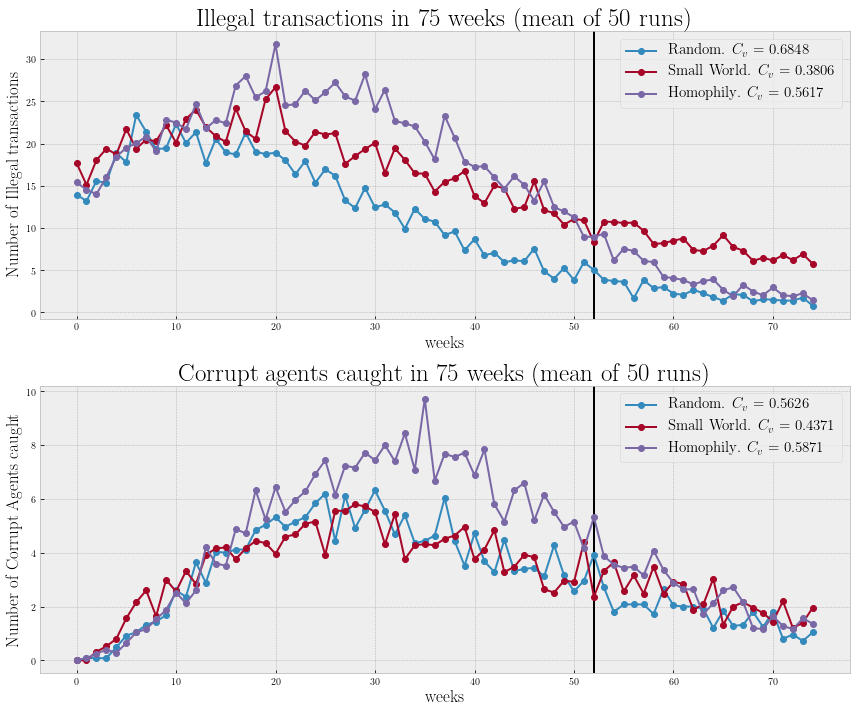

In [65]:
plt.figure(figsize=(12, 10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.subplot(211)
plt.title("Illegal transactions in 75 weeks (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Illegal transactions", fontsize=17)
plt.axvline(52, color='black')
plt.plot(list(transA2.keys()), list(transA2.values()), "o-", 
         label=f"Random. $C_v =$ {np.std(list(transA2.values())) / np.mean(list(transA2.values())): .4f}")
plt.plot(list(transB2.keys()),list(transB2.values()), "o-", 
         label=f"Small World. $C_v =$ {np.std(list(transB2.values())) / np.mean(list(transB2.values())): .4f}")
plt.plot(list(transC2.keys()),list(transC2.values()), "o-", 
         label=f"Homophily. $C_v =$ {np.std(list(transC2.values())) / np.mean(list(transC2.values())): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()

plt.subplot(212)
plt.title("Corrupt agents caught in 75 weeks (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Corrupt Agents caught", fontsize=17)
plt.axvline(52, color='black')
plt.plot(list(jailedA2.keys()), list(jailedA2.values()), "o-",
        label=f"Random. $C_v =$ {np.std(list(jailedA2.values())) / np.mean(list(jailedA2.values())): .4f}")
plt.plot(list(jailedB2.keys()), list(jailedB2.values()), "o-", 
         label=f"Small World. $C_v =$ {np.std(list(jailedB2.values())) / np.mean(list(jailedB2.values())): .4f}")
plt.plot(list(jailedC2.keys()), list(jailedC2.values()), "o-", 
         label=f"Homophily. $C_v =$ {np.std(list(jailedC2.values())) / np.mean(list(jailedC2.values())): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()
#plt.savefig("../img/75weeks.png", dpi=300)

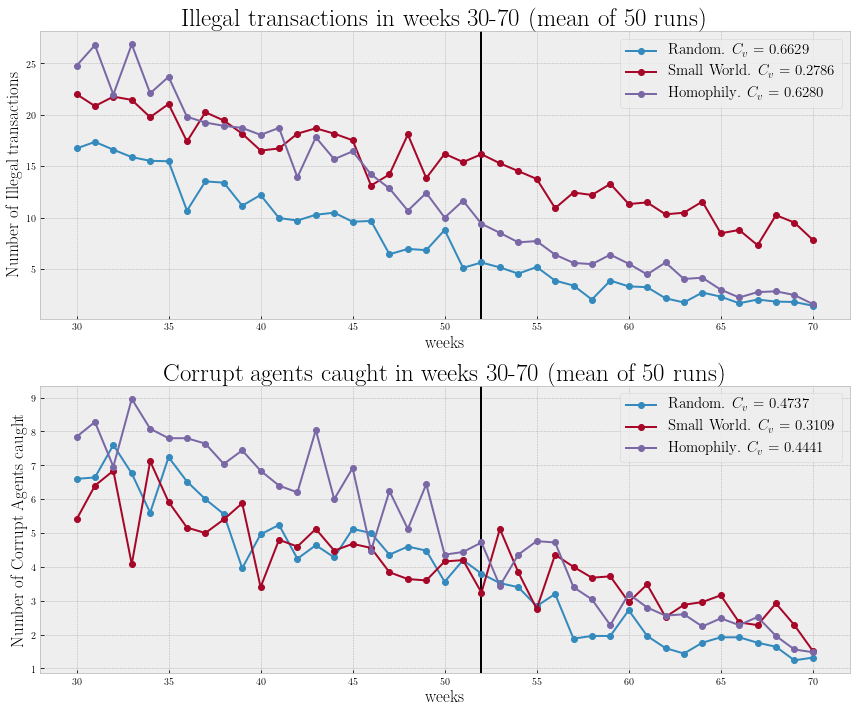

In [53]:
plt.figure(figsize=(12, 10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

therange = list(range(30, 71))

plt.subplot(211)
plt.title("Illegal transactions in weeks 30-70 (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Illegal transactions", fontsize=17)
plt.axvline(52, color='black')
plt.plot(therange, [transA[i] for i in therange], "o-", 
         label=f"Random. $C_v =$ {np.std([transA[i] for i in therange]) / np.mean([transA[i] for i in therange]): .4f}")
plt.plot(therange, [transB[i] for i in therange], "o-", 
         label=f"Small World. $C_v =$ {np.std([transB[i] for i in therange]) / np.mean([transB[i] for i in therange]): .4f}")
plt.plot(therange, [transC[i] for i in therange], "o-",
         label=f"Homophily. $C_v =$ {np.std([transC[i] for i in therange]) / np.mean([transC[i] for i in therange]): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()

plt.subplot(212)
plt.title("Corrupt agents caught in weeks 30-70 (mean of 50 runs)", fontsize=25)
plt.xlabel("weeks", fontsize=17)
plt.ylabel("Number of Corrupt Agents caught", fontsize=17)
plt.axvline(52, color='black')
plt.plot(therange, [jailedA[i] for i in therange], "o-", 
         label=f"Random. $C_v =$ {np.std([jailedA[i] for i in therange]) / np.mean([jailedA[i] for i in therange]): .4f}")
plt.plot(therange, [jailedB[i] for i in therange], "o-", 
         label=f"Small World. $C_v =$ {np.std([jailedB[i] for i in therange]) / np.mean([jailedB[i] for i in therange]): .4f}")
plt.plot(therange, [jailedC[i] for i in therange], "o-",
         label=f"Homophily. $C_v =$ {np.std([jailedC[i] for i in therange]) / np.mean([jailedC[i] for i in therange]): .4f}")
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("../img/weeks3070.png", dpi=300)

In [38]:
np.std([transC[i] for i in therange]) / np.mean([transC[i] for i in therange])

0.6280148496580524

## Efects of Risk Aversion

In [41]:
r1 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'u')
r1.Generate()
r1.NetSetup(0.2, 0.1)
r1.Subset()
for i in range(104):
    r1.Step(0.4, 0.002, newenter=True)
r11 = r1.getTransactions()

r2 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'l')
r2.Generate()
r2.NetSetup(0.2, 0.1)
r2.Subset()
for i in range(104):
    r2.Step(0.4, 0.002, newenter=True)
r21 = r2.getTransactions()

r3 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'm')
r3.Generate()
r3.NetSetup(0.2, 0.1)
r3.Subset()
for i in range(104):
    r3.Step(0.4, 0.002, newenter=True)
r31 = r3.getTransactions()

r4 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'h')
r4.Generate()
r4.NetSetup(0.2, 0.1)
r4.Subset()
for i in range(104):
    r4.Step(0.4, 0.002, newenter =True)
r41 = r4.getTransactions()

In [32]:
def dopara2(a, b, c, d, e, f, g, h, i):
    one = abm.Model(a, b, c, d, e, f, g, h, i)
    one.Generate()
    one.NetSetup(0.2, 0.1)
    one.Subset()
    for _ in range(208):
        one.Step(0.4, 0.002, newenter=True)
    aaa = one.getTransactions()
    result = {}
    result['transactions'] = aaa
    return result

In [35]:
t0 = datetime.datetime.now()

riskav_u = []
riskav_l = []
riskav_m = []
riskav_h = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    resultsu = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'u') for _ in range(50)]
    #resultsl = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'l') for _ in range(50)]
    resultsm = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'm') for _ in range(50)]
    resultsh = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'h') for _ in range(50)]
    
    for f in concurrent.futures.as_completed(resultsu):
        riskav_u.append(f.result())  
        
    #for f in concurrent.futures.as_completed(resultsl):
    #    riskav_l.append(f.result())
    
    for f in concurrent.futures.as_completed(resultsm):
        riskav_m.append(f.result())
        
    for f in concurrent.futures.as_completed(resultsh):
        riskav_h.append(f.result())
        
t1 = datetime.datetime.now()
delta = t1 - t0
print(f'Took {delta} to run in parallel')

Took 0:04:18.090554 to run in parallel


In [36]:
trans_risku = {}
for week in range(208):
    weekT = []
    for run in range(len(riskav_u)):
        weekT.append(riskav_u[run]['transactions'][week])
    trans_risku[week] = np.mean(weekT)  
    
#trans_riskl = {}
#for week in range(208):
#    weekT = []
#    for run in range(len(riskav_l)):
#        weekT.append(riskav_l[run]['transactions'][week])
#    trans_riskl[week] = np.mean(weekT)  
    
trans_riskm = {}
for week in range(208):
    weekT = []
    for run in range(len(riskav_m)):
        weekT.append(riskav_m[run]['transactions'][week])
    trans_riskm[week] = np.mean(weekT) 
    
trans_riskh = {}
for week in range(208):
    weekT = []
    for run in range(len(riskav_h)):
        weekT.append(riskav_h[run]['transactions'][week])
    trans_riskh[week] = np.mean(weekT)  

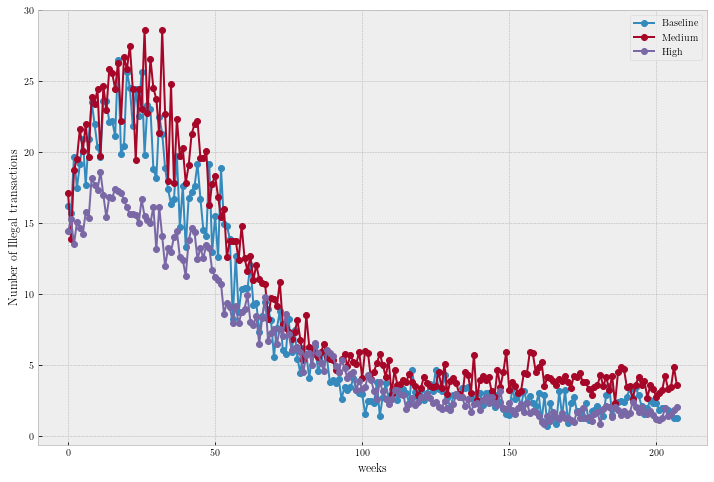

In [39]:
plt.figure(figsize=(12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel("weeks")
plt.ylabel("Number of Illegal transactions")
plt.plot(trans_risku.keys(), trans_risku.values(), "o-", label="Baseline")
#plt.plot(trans_riskl.keys(), trans_riskl.values(), "o-", label="Low")
plt.plot(trans_riskm.keys(), trans_riskm.values(), "o-", label="Medium")
plt.plot(trans_riskh.keys(), trans_riskh.values(), "o-", label="High")
plt.legend()
plt.savefig("../img/paper_plot2.png", dpi=300)

## Changes in the proportion of corrupt agents

In [50]:
c1 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.01, 'u')
c1.Generate()
c1.NetSetup(0.2, 0.1)
c1.Subset()
for i in range(104):
    c1.Step(0.4, 0.002, newenter=True)
c11 = c1.getTransactions()

c2 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.2, 'u')
c2.Generate()
c2.NetSetup(0.2, 0.1)
c2.Subset()
for i in range(104):
    c2.Step(0.4, 0.002, newenter=True)
c21 = c2.getTransactions()

c3 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.4, 'u')
c3.Generate()
c3.NetSetup(0.2, 0.1)
c3.Subset()
for i in range(104):
    c3.Step(0.4, 0.002, newenter=True)
c31 = c3.getTransactions()

c4 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.6, 'u')
c4.Generate()
c4.NetSetup(0.2, 0.1)
c4.Subset()
for i in range(104):
    c4.Step(0.4, 0.002, newenter=True)
c41 = c4.getTransactions()

c5 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.8, 'u')
c5.Generate()
c5.NetSetup(0.2, 0.1)
c5.Subset()
for i in range(104):
    c5.Step(0.4, 0.002, newenter=True)
c51 = c5.getTransactions()

c6 = abm.Model(500, 'S', 'R', 20, 30, 100, 0.1, 0.99, 'u')
c6.Generate()
c6.NetSetup(0.2, 0.1)
c6.Subset()
for i in range(104):
    c6.Step(0.4, 0.002, newenter=True)
c61 = c6.getTransactions()

In [42]:
t0 = datetime.datetime.now()

corr1 = []
corr20 = []
corr40 = []
corr60 = []
corr80 = []
corr99 = []

with concurrent.futures.ProcessPoolExecutor() as executor:
    results1 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.01, 'u') for _ in range(50)]
    results20 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.2, 'u') for _ in range(50)]
    results40 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.4, 'u') for _ in range(50)]
    results60 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.6, 'u') for _ in range(50)]
#    results80 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.8, 'u') for _ in range(50)]
#    results99 = [executor.submit(dopara2, 500, 'S', 'H', 50, 100, 100, 0.1, 0.99, 'u') for _ in range(50)]
    
    for f in concurrent.futures.as_completed(results1):
        corr1.append(f.result())  
        
    for f in concurrent.futures.as_completed(results20):
        corr20.append(f.result())
    
    for f in concurrent.futures.as_completed(results40):
        corr40.append(f.result())
        
    for f in concurrent.futures.as_completed(results60):
        corr60.append(f.result())
        
#    for f in concurrent.futures.as_completed(results80):
#        corr80.append(f.result())
        
#    for f in concurrent.futures.as_completed(results99):
#        corr99.append(f.result())
        
t1 = datetime.datetime.now()
delta = t1 - t0
print(f'Took {delta} to run in parallel')

Took 0:05:21.127222 to run in parallel


In [43]:
trans_corr1 = {}
for week in range(208):
    weekT = []
    for run in range(len(corr1)):
        weekT.append(corr1[run]['transactions'][week])
    trans_corr1[week] = np.mean(weekT)  
    
trans_corr20 = {}
for week in range(208):
    weekT = []
    for run in range(len(corr20)):
        weekT.append(corr20[run]['transactions'][week])
    trans_corr20[week] = np.mean(weekT) 
    
trans_corr40 = {}
for week in range(208):
    weekT = []
    for run in range(len(corr40)):
        weekT.append(corr40[run]['transactions'][week])
    trans_corr40[week] = np.mean(weekT) 
    
trans_corr60 = {}
for week in range(208):
    weekT = []
    for run in range(len(corr60)):
        weekT.append(corr60[run]['transactions'][week])
    trans_corr60[week] = np.mean(weekT) 
    
#trans_corr80 = {}
#for week in range(208):
#    weekT = []
#    for run in range(len(corr80)):
#        weekT.append(corr80[run]['transactions'][week])
#    trans_corr80[week] = np.mean(weekT)
    
#trans_corr99 = {}
#for week in range(208):
#    weekT = []
#    for run in range(len(corr99)):
#        weekT.append(corr99[run]['transactions'][week])
#    trans_corr99[week] = np.mean(weekT) 

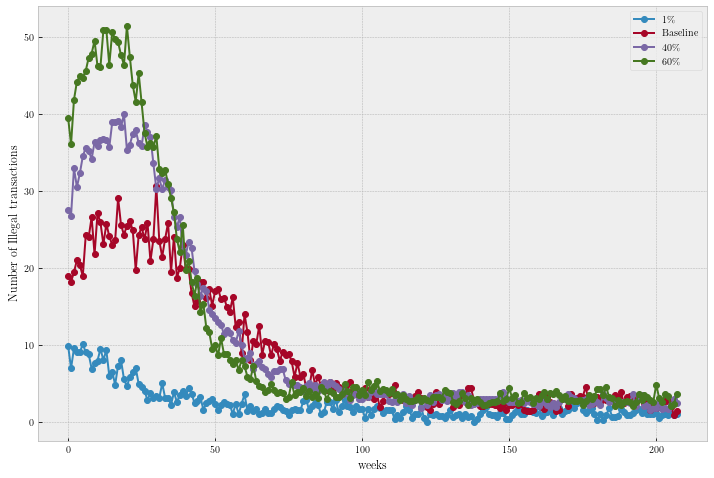

In [44]:
plt.figure(figsize=(12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel("weeks")
plt.ylabel("Number of Illegal transactions")
plt.plot(trans_corr1.keys(), trans_corr1.values(), "o-", label="1\%")
plt.plot(trans_corr20.keys(), trans_corr20.values(), "o-", label="Baseline")
plt.plot(trans_corr40.keys(), trans_corr40.values(), "o-", label="40\%")
plt.plot(trans_corr60.keys(), trans_corr60.values(), "o-", label="60\%")
#plt.plot(trans_corr80.keys(), trans_corr80.values(), "o-", label="80\%")
#plt.plot(trans_corr99.keys(), trans_corr99.values(), "o-", label="99\%")
plt.legend()
plt.savefig("../img/paper_plot3.png", dpi=300)